# LINEAR REGRESSION

Linear Regression models a relationship between two or more variable by fitting a straight line to data.

It is used to predict the future observations based on information of the past.
We can use Linear Regression to answer how each independent variable like gender,city can infulence the dependent variable salary
        
        

**The E-commerce company that sells clothing online is trying to decide whether to focus its efforts on its mobile app experience or its website based on the spent amount**

1. Read the dataset as a pandas dataset.
2. Do some primary analysis on that by using head, info, describe etc.
3. Plot the graphs.
4. Start with scikit learn and separate x and y.
5. Let y be Amount spent.
6. Split to test and train datasets..
7. Train the model and predict with test data.
8. Find MAE, MSE, RMSE.


MULTI-VARIENT Linear Regression

linear regression using multiple variables. In this case, rather than plotting a line, plotting a plane in multiple dimensions

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

In [2]:
# read the csv file as DataFrame

df = pd.read_csv('Linear Regression_ Problem Data Set.txt')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,4483 Jones Motorway Suite 872\r\nLake Jamiefur...,Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\r\nWest Richard, CA ...",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,0787 Andrews Ranch Apt. 633\r\nSouth Chadburgh...,Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\r\nBrendachester, ...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
# Analyzing the continous variables

df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
#cheking for the missing values

df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [5]:
# Analyzing the categorical variables

df.describe(include='object')

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",SlateBlue
freq,1,1,7


In [6]:
# the Avatar has high cardinality
# to convert categorical variables to numbers we can use,OneHotEncoder,LabelEncoder
# from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# enc = LabelEncoder()
# df['Avatar']=enc.fit_transform(df['Avatar'])
# here we are not using Avatar or any categorical values to predict 

In [7]:
# plotting the graph of relation 

import matplotlib.pyplot as plt

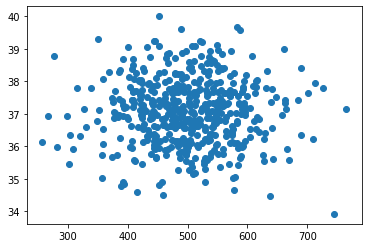

In [8]:
plt.scatter(y=df['Time on Website'],x=df['Yearly Amount Spent'])

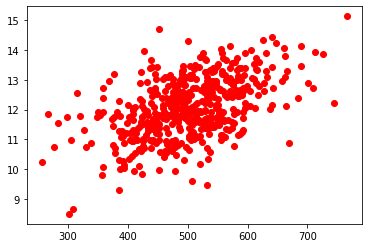

In [9]:
plt.scatter(y=df['Time on App'],x=df['Yearly Amount Spent'],color = 'r')

A coefficient of correlation is a value between -1 and +1 that denotes both the strength and directionality of a relationship between two variables. The closer the value is to 1 (or -1), the stronger a relationship. The closer a number is to 0, the weaker the relationship. A negative coefficient will tell us that the relationship is negative,

In [10]:
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [11]:
# creating a model that fits the data

from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()


### 1. preprocessing the data selecting the independent and dependent variables
### 2. splitting dataset into train and validation and saving some data for testing

In [13]:
xdf = df[['Time on Website','Length of Membership','Time on App','Avg. Session Length']]

ydf = df[['Yearly Amount Spent']]

In [14]:
# 10% for testing
test = df.shape[0] * 10 / 100

# 20% for validation
val = df.shape[0] * 20 / 100

# 70% for training
train = df.shape[0] * 70 /100

x_test,y_test = xdf.loc[:test-1],ydf.loc[:test-1]
x_val, y_val = xdf.loc[test:val+test-1],ydf.loc[test:val+test-1]
x_train, y_train = xdf.loc[val+test:],ydf.loc[test+val:]

In [15]:
test,train,val

(50.0, 350.0, 100.0)

To split the data randomly sklearn has function 

**from sklearn.model_selection import train_test_split**

   x_tr,x_te,y_tr,y_te=train_test_split(df,df['Yearly Amount Spent'],test_size=0.2random_state =3,shuffle=True)

In [16]:
model.fit(x_train,y_train)

LinearRegression()

In [17]:
# weights
model.coef_

array([[ 0.78877397, 61.94307598, 38.61989619, 25.95177257]])

By looking at the coeficients we can get an intution of which columns in independent variable influense more

In [18]:
type(x_val)

pandas.core.frame.DataFrame

In [19]:
# predicting with validation dataset
y_pred = model.predict(x_val)

In [20]:
# function to convert pandas series to  numpy
#y_val.to_numpy()

## VALIDATION METRICES

In [21]:
def mse(target,pred):
    return ((target-pred)**2).mean()

In [22]:
mseerror = mse(y_pred,df.loc[test:val+test-1,['Yearly Amount Spent']])
mseerror.values

array([104.26267358])

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# mean_squared_error??

In [24]:
model.score(x_val,y_val)

0.9788557516248106

# r2_score
R squared	0-1 (larger is better)	

    The proportion of the variance in the predicted variable (y) that can be explained by the features (X)

In [25]:
r2 = r2_score(y_pred,y_val)
r2

0.9794768212332489

In [26]:
mae = mean_absolute_error(np.log(y_pred),np.log(df.loc[test:val+test-1,['Yearly Amount Spent']]))
mae

0.016274112734019786

In [27]:
def mymae(target,pred):
    return (abs(target-pred)).mean()

In [28]:
mae = mymae(np.log(y_pred),np.log(df.loc[test:val+test-1,['Yearly Amount Spent']]))
mae

Yearly Amount Spent    0.016274
dtype: float64

In [29]:
root_mean_square_error = mean_squared_error(np.log(y_pred),np.log(df.loc[test:val+test-1,['Yearly Amount Spent']]),squared=False)
root_mean_square_error

0.02103652380799389

In [30]:
def rmse(target,pred):
    return np.sqrt(((target-pred)**2).mean())

In [31]:
rmse = rmse(np.log(y_pred),np.log(df.loc[test:val+test-1,['Yearly Amount Spent']]))
rmse

Yearly Amount Spent    0.021037
dtype: float64

In [32]:
import numpy as np

In [33]:
error = mean_squared_error(np.log(y_pred),np.log(df.loc[test:val+test-1,['Yearly Amount Spent']]))
error

0.00044253533392429374

The model has two attributes:

1. model.coef_ which stores an array of the coefficients of our model
2. model.intercept_ which stores the y-intercept of our linear model

In [34]:
model.coef_

array([[ 0.78877397, 61.94307598, 38.61989619, 25.95177257]])

In [35]:
model.intercept_

array([-1072.34696378])

THERE IS STRONG POSITIVE CORRELATION BETWEEN **Yearly Amount Spent** AND **Length Of  Membership**

The time on app has more positive correlation that time on website there for decide to focus company efforts on its mobile app experience 

[reference](https://datagy.io/python-sklearn-linear-regression/) 

In [36]:
x_test.shape

(50, 4)

In [37]:
XX = np.linspace(10, 15, 100)
XX = XX.reshape(-1,x_val.shape[1])
YY = model.predict(XX)


/home/azad/Desktop/jupyter/deep/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


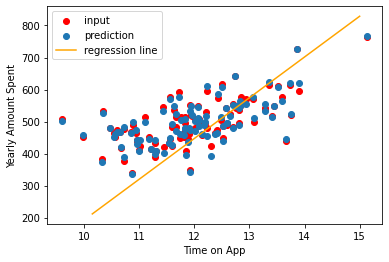

In [43]:
plt.scatter(x=x_val['Time on App'],y=y_val['Yearly Amount Spent'],color = 'r',label='input')
plt.scatter(x_val['Time on App'],y_pred,label = 'prediction')
plt.plot(XX[:,3],YY,c='orange', label='regression line')
plt.xlabel('Time on App')
plt.ylabel('Yearly Amount Spent')
plt.legend()

# plt.plot(y_pred,x_val)